##Q1 

In [ ]:
import numpy as np
import pandas as pd

import random
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('breast-cancer-wisconsin.data', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
# some values in column 6 contain "?" values, removing such rows
data[data.eq("?").any(1)]

,0,1,2,3,4,5,6,7,8,9,10
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [ ]:
# some values in column 6 contain "?" values, removing such rows
# reference: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

data = data[data.iloc[:,6] != "?"]

In [ ]:
#changing type of column 6 from obj to int
data.iloc[:,6] = pd.to_numeric(data.iloc[:, 6])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       683 non-null    int64
 1   1       683 non-null    int64
 2   2       683 non-null    int64
 3   3       683 non-null    int64
 4   4       683 non-null    int64
 5   5       683 non-null    int64
 6   6       683 non-null    int64
 7   7       683 non-null    int64
 8   8       683 non-null    int64
 9   9       683 non-null    int64
 10  10      683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [ ]:
data.shape

(683, 11)

In [ ]:
target = data.iloc[:, -1]
target.head(10)

0    2
1    2
2    2
3    2
4    2
5    4
6    2
7    2
8    2
9    2
Name: 10, dtype: int64

In [ ]:
train_data = data.iloc[:,1:10]

In [ ]:
train_data.head()

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [ ]:
target = target.map({2:0, 4:1})
# target = target.map({2:1, 4:0})


In [ ]:
#references used: 
# 1. https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c
# 2. Book: [Joel_Grus]_Data_Science_from_Scratch

In [ ]:
def initial_centroids(df, k):
  random_indices = np.random.choice(len(df), size=k, replace=False)
  centroids =  df[random_indices, :]
  return centroids

In [ ]:
def calculate_distance(row, centroid):
  dist = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
  return dist

In [ ]:
def kmeans(df, k):
  
  #declaring a variable for while loop
  a = 1
  
  #creating an array for storing cluster assignments
  cluster_no = np.zeros(df.shape[0])

  # select k random centroids
  centroids = initial_centroids(df, k)

  while a == 1:

    # for each row
    for i, row in enumerate(df):

      #initially setting distance large
      distance = 1000000000000000000.0
      # distance of the point from all centroids
      for j, centroid in enumerate(centroids):
        new_distance = calculate_distance(row, centroid)

        # store closest centroid 
        if distance > new_distance:
          distance = new_distance
          cluster_no[i] = j

    #cluster-wise mean calculation
    new_centroids = pd.DataFrame(df).groupby(by=cluster_no).mean().values

    # if the previous and new centroids are same, then exit
    # else assign new centroids and continue
    if centroids.all() == new_centroids.all():
      a = 0
    else:
      centroids = new_centroids
      
  return cluster_no

In [ ]:
train_data1 = train_data.values

**Implementation 1:**




In [ ]:
cluster = kmeans(train_data1, 2)

In [ ]:
# print(cluster)

Accuracy of KMeans:

In [ ]:
print(classification_report(target, cluster))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       444
           1       0.97      0.61      0.75       239

    accuracy                           0.86       683
   macro avg       0.90      0.80      0.82       683
weighted avg       0.87      0.86      0.85       683



The algorithm returns the accuracy of: 0.86

[the accuracy changes according to the initial centers]

**Implementation 2:**




In [ ]:
cluster = kmeans(train_data1, 2)

In [ ]:
# print(cluster)

Accuracy of KMeans:

In [ ]:
print(classification_report(target, cluster))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       444
           1       0.97      0.81      0.88       239

    accuracy                           0.92       683
   macro avg       0.94      0.90      0.91       683
weighted avg       0.93      0.92      0.92       683



The algorithm returns the accuracy of: 0.92

[the accuracy changes according to the initial centers]

**Implementation 3:**




In [ ]:
cluster = kmeans(train_data1, 2)

In [ ]:
# print(cluster)

Accuracy of KMeans:

In [ ]:
print(classification_report(target, cluster))

              precision    recall  f1-score   support

           0       0.94      0.62      0.74       444
           1       0.56      0.92      0.70       239

    accuracy                           0.72       683
   macro avg       0.75      0.77      0.72       683
weighted avg       0.81      0.72      0.73       683



The algorithm returns the accuracy of: 0.72

**Conclusion:** The accuracy changes every time according to the initial centers. 
As the Kmeans algorithm starts with the random center assignments, the result changes from run-to-run.

**Using Supervised Method**
- Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X = data.iloc[:, 1:10]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred_test_log = logmodel.predict(X_test)
pred_log = logmodel.predict(X_train)

In [ ]:
print(classification_report(y_test,pred_test_log))

              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



The Logistic regression model returns higher accuracy than the KMeans method i.e. 0.96.

## **Q**. 2




In [ ]:
import numpy as np
import numpy.linalg
from numpy.linalg import inv, pinv

In [ ]:
    def gaussian(self, X):
        means = {}  # uk
        covariance = {}  # Sigma k
        priors = {}  # p(Ck)
        for class_id, values in X.items():
            proj = []
            for point in values:
                proj = np.dot(point, self.W.T)
                proj.append(proj)
            proj = np.asarray(proj)
            means[class_id] = np.mean(proj, axis=0)
            covariance[class_id] = np.cov(proj, rowvar=False)  # this is the within-class covariance, or Sw
            
            priors[class_id] = len(values) / self.N
        return means, covariance, priors

    # RETURNS AN ARRAY OF CLASS PREDICTIONS

        return p_p, c_p


In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

print(train_y)

##Q.3

In [ ]:
import numpy as np
from numpy.matlib import repmat 

In [ ]:
import matplotlib
matplotlib.use('PDF')
import matplotlib.pyplot as plt
import sys
from scipy.io import loadmat
import time

%matplotlib inline


In [ ]:
#l2distance Helper Function
def l2distance(X, Z=None):
    if Z is None:
        n, d = X.shape
        s1 = np.sum(np.power(X, 2), axis=1).reshape(-1,1)
        D1 = -2 * np.dot(X, X.T) + repmat(s1, 1, n)
        D = D1 + repmat(s1.T, n, 1)
        np.fill_diagonal(D, 0)
        D = np.sqrt(np.maximum(D, 0))
    else:
        n, d = X.shape
        m, _ = Z.shape
        s1 = np.sum(np.power(X, 2), axis=1).reshape(-1,1)
        s2 = np.sum(np.power(Z, 2), axis=1).reshape(1,-1)
        D1 = -2 * np.dot(X, Z.T) + repmat(s1, 1, m)
        D = D1 + repmat(s2, n, 1)
        D = np.sqrt(np.maximum(D, 0))
    return D

In [ ]:
#toydata Helper Function
def toydata(OFFSET,N):   
    NHALF = int(np.ceil(N/2))
    x = np.random.randn(N, 2)
    x[NHALF:, :] += OFFSET  
    
    y = np.ones(N)
    y[NHALF:] *= 2
    
    jj = np.random.permutation(N)
    return x[jj, :], y[jj]

### (a) Noise (computeybar)

In [ ]:
def computeybar(xTe, OFFSET):

    n,temp = xTe.shape
    ybar = np.zeros(n)  
    normpdf = lambda x, mu, sigma: np.exp(-0.5 * np.power((x - mu) / sigma, 2)) / (np.sqrt(2 * np.pi) * sigma)
    
    pxy1=normpdf(xTe,0,1)
    pxxy1=pxy1[:,0]*pxy1[:,1]
    pxy2=normpdf(xTe,OFFSET,1)
    pxxy2=pxy2[:,0]*pxy2[:,1]
    
    pxx=pxxy1*0.5+pxxy2*0.5
    
    
    py1xx=pxxy1*0.5/pxx
    py2xx=pxxy2*0.5/pxx
    
    ybar=py1xx+2*py2xx
    
    return ybar

77
Error of Bayes classifier: 7.7%.


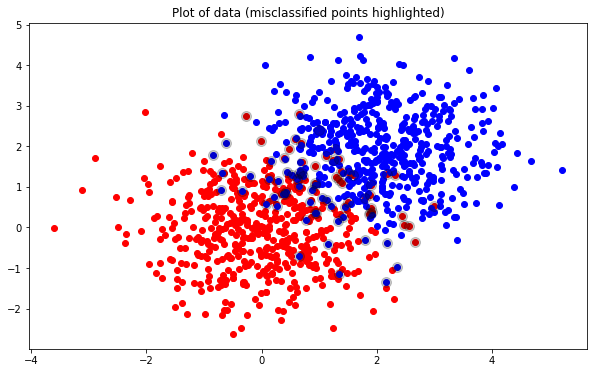

In [ ]:
OFFSET = 2
xTe, yTe = toydata(OFFSET, 1000)

# Bayes Error
ybar = computeybar(xTe, OFFSET)
predictions = np.round(ybar)
errors = predictions != yTe
err = errors.sum() / len(yTe) * 100
print(errors.sum())
print('Error of Bayes classifier: %.1f%%.' % err)

# plotting the data
i1 = yTe == 1
i2 = yTe == 2
plt.figure(figsize=(10,6))
plt.scatter(xTe[i1, 0], xTe[i1, 1], c='r', marker='o')
plt.scatter(xTe[i2, 0], xTe[i2, 1], c='b', marker='o')
plt.scatter(xTe[errors, 0], xTe[errors, 1], c='k', s=100, alpha=0.2)
plt.title("Plot of data (misclassified points highlighted)")
plt.show()

In [ ]:
#kregression Helper Function
def kregression(xTr,yTr,sigma=0.1,lmbda=0.01):
    kernel = lambda x, z: np.power(1+(np.power(l2distance(x,z),2) / (2 * np.power(sigma,2))),-4)
    ridge = lambda K, lmbda2: K + lmbda * np.eye(K.shape[0], K.shape[1])
    beta = np.linalg.solve(ridge(kernel(xTr, xTr), lmbda), yTr)
    
    fun = lambda Xt: np.dot(kernel(Xt, xTr), beta)
    return fun

###(b) Bias (computehbar)

In [ ]:
def computehbar(xTe, sigma, lmbda, Nsmall, NMODELS, OFFSET):
    n = xTe.shape[0]
    hbar = np.zeros(n)
    for j in range(NMODELS):
        ## fill in code here
        xTr,yTr=toydata(OFFSET,Nsmall)
        model=kregression(xTr,yTr,sigma,lmbda)
        hbar+=model(xTe)    
    hbar /= NMODELS
    return hbar

###(c) Variance (computevariance)

In [ ]:
def computevariance(xTe, sigma, lmbda, hbar, Nsmall, NMODELS, OFFSET):
    n = xTe.shape[0]
    variance = np.zeros(n)
      
    for j in range(NMODELS):
        ## fill in code here
        xTr,yTr=toydata(OFFSET,Nsmall)
        model=kregression(xTr,yTr,sigma,lmbda)
        variance+=(model(xTe)-hbar)**2    
    
    variance = np.mean(variance)/NMODELS
    return variance

###(d) Demo (biasvariancedemo)

In [ ]:
# biasvariancedemo

#training set size N
Nsmall = 10
#really big data set size
Nbig = 10000
# number of models
NMODELS = 100
#regularization constants to evaluate
lmbdas = np.arange(-6, 0+0.5, 0.5)
#kernel width
sigma = 4

# we store
Nlambdas = len(lmbdas)
lbias = np.zeros(Nlambdas)
lvariance = np.zeros(Nlambdas)
ltotal = np.zeros(Nlambdas)
lnoise = np.zeros(Nlambdas)
lsum = np.zeros(Nlambdas)

# Different regularization constant classifiers
for md in range(Nlambdas):
    lmbda = 2 ** lmbdas[md]

    xTe,yTe = toydata(OFFSET,Nbig)
    
    # Estimate AVERAGE ERROR (TOTAL)
    total = 0
    for j in range(NMODELS):
        xTr2,yTr2 = toydata(OFFSET,Nsmall)
        fsmall = kregression(xTr2,yTr2,sigma,lmbda)
        total += np.mean((fsmall(xTe) - yTe) ** 2)
    total /= NMODELS
    
    # Estimate Noise
    ybar = computeybar(xTe, OFFSET)
    noise = np.mean((yTe-ybar) ** 2)
    
    # Estimate Bias
    hbar = computehbar(xTe,sigma, lmbda, Nsmall, NMODELS, OFFSET)
    bias = np.mean((hbar-ybar) ** 2)

    # Estimating VARIANCE
    variance = computevariance(xTe,sigma,lmbda,hbar, Nsmall, NMODELS, OFFSET)
    
    # print and store results
    lbias[md] = bias
    lvariance[md] = variance
    ltotal[md] = total
    lnoise[md] = noise
    lsum[md] = lbias[md]+lvariance[md]+lnoise[md]
    print('Regularization λ=2^%2.1f: Bias: %2.4f Variance: %2.4f Noise: %2.4f Bias+Variance+Noise: %2.4f Test error: %2.4f'
          % (lmbdas[md],lbias[md],lvariance[md],lnoise[md],lsum[md],ltotal[md]))

Regularization λ=2^-6.0: Bias: 0.0290 Variance: 0.0854 Noise: 0.0563 Bias+Variance+Noise: 0.1707 Test error: 0.1616
Regularization λ=2^-5.5: Bias: 0.0299 Variance: 0.0680 Noise: 0.0572 Bias+Variance+Noise: 0.1551 Test error: 0.1585
Regularization λ=2^-5.0: Bias: 0.0304 Variance: 0.0573 Noise: 0.0581 Bias+Variance+Noise: 0.1458 Test error: 0.1602
Regularization λ=2^-4.5: Bias: 0.0299 Variance: 0.0513 Noise: 0.0589 Bias+Variance+Noise: 0.1400 Test error: 0.1505
Regularization λ=2^-4.0: Bias: 0.0356 Variance: 0.0464 Noise: 0.0563 Bias+Variance+Noise: 0.1384 Test error: 0.1338
Regularization λ=2^-3.5: Bias: 0.0416 Variance: 0.0460 Noise: 0.0577 Bias+Variance+Noise: 0.1453 Test error: 0.1377
Regularization λ=2^-3.0: Bias: 0.0518 Variance: 0.0390 Noise: 0.0608 Bias+Variance+Noise: 0.1516 Test error: 0.1456
Regularization λ=2^-2.5: Bias: 0.0477 Variance: 0.0353 Noise: 0.0577 Bias+Variance+Noise: 0.1408 Test error: 0.1428
Regularization λ=2^-2.0: Bias: 0.0581 Variance: 0.0285 Noise: 0.0552 Bia

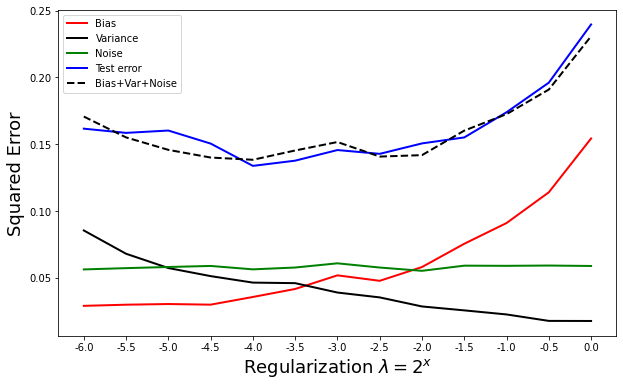

In [ ]:
# plot results
plt.figure(figsize=(10,6))
plt.plot(lbias[:Nlambdas],c='r',linestyle='-',linewidth=2)
plt.plot(lvariance[:Nlambdas],c='k', linestyle='-',linewidth=2)
plt.plot(lnoise[:Nlambdas],c='g', linestyle='-',linewidth=2)
plt.plot(ltotal[:Nlambdas],c='b', linestyle='-',linewidth=2)
plt.plot(lsum[:Nlambdas],c='k', linestyle='--',linewidth=2)

plt.legend(["Bias","Variance","Noise","Test error","Bias+Var+Noise"]);
plt.xlabel("Regularization $\lambda=2^x$",fontsize=18);
plt.ylabel("Squared Error",fontsize=18);
plt.xticks([i for i in range(Nlambdas)],lmbdas);